In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
dim_df = pd.read_excel(r'C:/Users/ASUS/Downloads/IPL-Predictor-Past-Trends-Future-Champions-main/IPL-Predictor-Excel-Files/fact_bolwing_summary.xlsx')

In [7]:
dim_df.columns

Index(['match_id', 'match', 'bowlingTeam', 'Bowler Name', 'overs', 'balls',
       'maiden', 'runs', 'wickets', 'economy', 'Zeros', 'wides', 'noBalls',
       'Year'],
      dtype='object')

In [8]:
dim_df.head(10)

,match_id,match,bowlingTeam,Bowler Name,overs,balls,maiden,runs,wickets,economy,Zeros,wides,noBalls,Year
0,T202715,rajasthan royals vs gujarat titans,Gujarat Titans,MohammedShami,4.0,24.0,0,33,1,8.25,12,0,0,2022
1,T202715,rajasthan royals vs gujarat titans,Gujarat Titans,Yash Dayal,3.0,18.0,0,18,1,6.00,9,0,0,2022
2,T202715,rajasthan royals vs gujarat titans,Gujarat Titans,Lockie Ferguson,3.0,18.0,0,22,0,7.33,5,0,0,2022
3,T202715,rajasthan royals vs gujarat titans,Gujarat Titans,RashidKhan,4.0,24.0,0,18,1,4.50,9,0,0,2022
4,T202715,rajasthan royals vs gujarat titans,Gujarat Titans,Hardik Pandya,4.0,24.0,0,17,3,4.25,14,0,0,2022
5,T202715,rajasthan royals vs gujarat titans,Gujarat Titans,Sai Kishore,2.0,12.0,0,20,2,10.00,3,0,0,2022
6,T202715,rajasthan royals vs gujarat titans,Rajasthan Royals,Trent Boult,4.0,24.0,1,14,1,3.50,17,2,0,2022
7,T202715,rajasthan royals vs gujarat titans,Rajasthan Royals,PrasidhKrishna,4.0,24.0,0,40,1,10.00,13,2,0,2022
8,T202715,rajasthan royals vs gujarat titans,Rajasthan Royals,Yuzvendra Chahal,4.0,24.0,0,20,1,5.00,10,0,0,2022
9,T202715,rajasthan royals vs gujarat titans,Rajasthan Royals,ObedMcCoy,3.1,18.6,0,26,0,8.21,5,0,0,2022


In [9]:
dim_df.tail(10)

,match_id,match,bowlingTeam,Bowler Name,overs,balls,maiden,runs,wickets,economy,Zeros,wides,noBalls,Year
2561,T210015,kolkata knight riders vs sunrisers hyderabad,Kolkata Knight Riders,Harshit Rana,3.0,18.0,0,24,2,8.00,2,2,0,2024
2562,T210015,kolkata knight riders vs sunrisers hyderabad,Kolkata Knight Riders,Andre Russell,2.3,13.8,0,19,3,7.60,1,3,0,2024
2563,T210015,kolkata knight riders vs sunrisers hyderabad,Kolkata Knight Riders,Sunil Narine,2.0,12.0,0,16,1,8.00,0,1,0,2024
2564,T210015,kolkata knight riders vs sunrisers hyderabad,Kolkata Knight Riders,Varun Chakaravarthy,3.0,18.0,0,16,1,5.33,5,1,0,2024
2565,T210015,kolkata knight riders vs sunrisers hyderabad,Sunrisers Hyderabad,Bhuvneshwar Kumar,2.0,12.0,0,29,0,14.50,0,0,0,2024
2566,T210015,kolkata knight riders vs sunrisers hyderabad,Sunrisers Hyderabad,Pat Cummins,2.0,12.0,0,16,1,8.00,0,1,0,2024
2567,T210015,kolkata knight riders vs sunrisers hyderabad,Sunrisers Hyderabad,T Natarajan,2.0,12.0,0,24,0,12.00,1,0,0,2024
2568,T210015,kolkata knight riders vs sunrisers hyderabad,Sunrisers Hyderabad,Shahbaz Ahmed,2.3,13.8,0,34,1,13.60,0,1,0,2024
2569,T210015,kolkata knight riders vs sunrisers hyderabad,Sunrisers Hyderabad,Abhishek Sharma,1.0,6.0,0,9,0,9.00,0,0,0,2024
2570,T210015,kolkata knight riders vs sunrisers hyderabad,Sunrisers Hyderabad,Aiden Markram,1.0,6.0,0,5,0,5.00,0,0,0,2024


In [10]:
dim_df.shape

(2571, 14)

In [17]:
# Mapping of short or alternate names to full team names
team_name_map = {
    'KKR': 'Kolkata Knight Riders',
    'RCB': 'Royal Challengers Bangalore',
    'mi': 'Mumbai Indians',
    'MI': 'Mumbai Indians',
    'Mumbai':'Mumbai Indians',
    'Capitals': 'Delhi Capitals',
    'DC': 'Delhi Capitals',
    'Punjab Kings': 'Punjab Kings',
    'Super Kings': 'Chennai Super Kings',
    'CSK': 'Chennai Super Kings',
    'Royals': 'Rajasthan Royals',
    'RR': 'Rajasthan Royals',
    'Sunrisers': 'Sunrisers Hyderabad',
    'SRH': 'Sunrisers Hyderabad',
    'Titans': 'Gujarat Titans',
    'GT': 'Gujarat Titans',
    'Super Giants': 'Lucknow Super Giants',
    'LSG': 'Lucknow Super Giants',
    'rcb': 'Royal Challengers Bengaluru',
    'rr': 'Rajasthan Royals',
    'srh': 'Sunrisers Hyderabad',
    'pk': 'Punjab Kings',
    'lsg': 'Lucknow Super Giants',
    'csk': 'Chennai Super Kings',
    'kkr': 'Kolkata Knight Riders',
    'gt': 'Gujarat Titans',
    'dc': 'Delhi Capitals',
    'lrg': 'Lucknow Super Giants',
    'kolkata':'Kolkata Knight Riders',
    'rajasthan':'Rajasthan Royals',
    'gujrat':'Gujarat Titans',
    'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
    "super kings": "Chennai Super Kings",
    "ck": "Chennai Super Kings",
    "Royal Challengers Bengaluru": "Royal Challengers Bengaluru",
    "Kolkata Knight Riders": "Kolkata Knight Riders",
    "kkr": "Kolkata Knight Riders",
    "punjab kings": "Punjab Kings",
    "pbks": "Punjab Kings",
    "mumbai": "Mumbai Indians",
    "mi": "Mumbai Indians",
    "capitals": "Delhi Capitals",
    "dc": "Delhi Capitals",
    "super giants": "Lucknow Super Giants",
    "lsg": "Lucknow Super Giants",
    "titans": "Gujarat Titans",
    "gt": "Gujarat Titans",
    "royals": "Rajasthan Royals",
    "rr": "Rajasthan Royals",
    "sunrisers": "Sunrisers Hyderabad",
    "srh": "Sunrisers Hyderabad"
}

# Apply mapping to all team columns
dim_df['bowlingTeam'] = dim_df['bowlingTeam'].replace(team_name_map)
dim_df['match'] = dim_df['match'].replace(team_name_map)



In [20]:
# Step 1: Normalize text to lowercase and strip spaces for mapping to work correctly
dim_df['bowlingTeam'] = dim_df['bowlingTeam'].str.lower().str.strip().replace(team_name_map)
dim_df['bowlingTeam'] = dim_df['bowlingTeam'].replace(team_name_map)  # Apply again after cleaning

# Step 2: Clean and map team names inside the 'match' column
def standardize_match_name(match_str):
    try:
        team1, team2 = match_str.lower().strip().split(' vs ')
        full_team1 = team_name_map.get(team1.strip(), team1.title())
        full_team2 = team_name_map.get(team2.strip(), team2.title())
        return f"{full_team1} vs {full_team2}"
    except Exception:
        return match_str  # Return original if error
        

dim_df['match'] = dim_df['match'].apply(standardize_match_name)


In [21]:
dim_df.head(30)

,match_id,match,bowlingTeam,Bowler Name,overs,balls,maiden,runs,wickets,economy,Zeros,wides,noBalls,Year
0,T202715,Rajasthan Royals vs Gujarat Titans,gujarat titans,MohammedShami,4.0,24.0,0,33,1,8.25,12,0,0,2022
1,T202715,Rajasthan Royals vs Gujarat Titans,gujarat titans,Yash Dayal,3.0,18.0,0,18,1,6.00,9,0,0,2022
2,T202715,Rajasthan Royals vs Gujarat Titans,gujarat titans,Lockie Ferguson,3.0,18.0,0,22,0,7.33,5,0,0,2022
3,T202715,Rajasthan Royals vs Gujarat Titans,gujarat titans,RashidKhan,4.0,24.0,0,18,1,4.50,9,0,0,2022
4,T202715,Rajasthan Royals vs Gujarat Titans,gujarat titans,Hardik Pandya,4.0,24.0,0,17,3,4.25,14,0,0,2022
5,T202715,Rajasthan Royals vs Gujarat Titans,gujarat titans,Sai Kishore,2.0,12.0,0,20,2,10.00,3,0,0,2022
6,T202715,Rajasthan Royals vs Gujarat Titans,rajasthan royals,Trent Boult,4.0,24.0,1,14,1,3.50,17,2,0,2022
7,T202715,Rajasthan Royals vs Gujarat Titans,rajasthan royals,PrasidhKrishna,4.0,24.0,0,40,1,10.00,13,2,0,2022
8,T202715,Rajasthan Royals vs Gujarat Titans,rajasthan royals,Yuzvendra Chahal,4.0,24.0,0,20,1,5.00,10,0,0,2022
9,T202715,Rajasthan Royals vs Gujarat Titans,rajasthan royals,ObedMcCoy,3.1,18.6,0,26,0,8.21,5,0,0,2022


In [22]:
dim_df.tail(5)

,match_id,match,bowlingTeam,Bowler Name,overs,balls,maiden,runs,wickets,economy,Zeros,wides,noBalls,Year
2566,T210015,Kolkata Knight Riders vs Sunrisers Hyderabad,sunrisers hyderabad,Pat Cummins,2.0,12.0,0,16,1,8.0,0,1,0,2024
2567,T210015,Kolkata Knight Riders vs Sunrisers Hyderabad,sunrisers hyderabad,T Natarajan,2.0,12.0,0,24,0,12.0,1,0,0,2024
2568,T210015,Kolkata Knight Riders vs Sunrisers Hyderabad,sunrisers hyderabad,Shahbaz Ahmed,2.3,13.8,0,34,1,13.6,0,1,0,2024
2569,T210015,Kolkata Knight Riders vs Sunrisers Hyderabad,sunrisers hyderabad,Abhishek Sharma,1.0,6.0,0,9,0,9.0,0,0,0,2024
2570,T210015,Kolkata Knight Riders vs Sunrisers Hyderabad,sunrisers hyderabad,Aiden Markram,1.0,6.0,0,5,0,5.0,0,0,0,2024


In [25]:
# # List of numeric columns to clean
# columns_to_convert = ['overs', 'maiden', 'runs', 'wickets', 'economy', 'wides', 'noBalls']

# # Drop rows with NaN in any of these columns
# dim_df.dropna(subset=columns_to_convert, inplace=True)




In [23]:
# print(dim_df[columns_to_convert].isna().sum())



overs      0
maiden     0
runs       0
wickets    0
economy    0
wides      0
noBalls    0
dtype: int64


In [24]:
    # # Check which columns have NaNs
    # print(dim_df[columns_to_convert].isna().sum())


overs      0
maiden     0
runs       0
wickets    0
economy    0
wides      0
noBalls    0
dtype: int64


In [26]:
top_wicket_takers = dim_df.groupby('Bowler Name')['wickets'].sum().sort_values(ascending=False).head(10)
print("Top 10 Wicket Takers:\n", top_wicket_takers)


Top 10 Wicket Takers:
 Bowler Name
Yuzvendra Chahal       66
Harshal Patel          57
Arshdeep Singh         49
MohammedShami          48
Kuldeep Yadav          48
Varun Chakaravarthy    47
RashidKhan             46
Avesh Khan             45
Trent Boult            45
Mohammed Siraj         43
Name: wickets, dtype: int64


In [152]:
economy = dim_df.groupby('Bowler Name').agg({'overs': 'sum', 'runs': 'sum'})
economy = economy[economy['overs'] >= 5]
economy['economy'] = economy['runs'] / economy['overs']
best_economy = economy.sort_values('economy').head(10)
print("Best Economy Rates (Min 5 Overs):\n", best_economy)


Best Economy Rates (Min 5 Overs):
                   overs  runs   economy
Bowler Name                            
 Rashid Khan        8.0    46  5.750000
Mayank Yadav       12.0    71  5.916667
Prashant Solanki    6.0    38  6.333333
David Willey       26.0   177  6.807692
Sunil Narine      149.0  1017  6.825503
Mitchell Santner   40.0   275  6.875000
Jasprit Bumrah    100.7   701  6.961271
Axar Patel        129.0   930  7.209302
Pradeep Sangwan     9.0    65  7.222222
Krunal Pandya     107.0   809  7.560748


In [27]:
maiden_counts = dim_df.groupby('Bowler Name')['maiden'].sum().sort_values(ascending=False).head(10)
print("Top 10 Bowlers by Maidens:\n", maiden_counts)


Top 10 Bowlers by Maidens:
 Bowler Name
Trent Boult          6
Bhuvneshwar Kumar    5
Khaleel Ahmed        4
PrasidhKrishna       3
Harshal Patel        2
Mohsin Khan          2
Umesh Yadav          2
MohammedShami        2
Jasprit Bumrah       2
Basil Thampi         1
Name: maiden, dtype: int64


In [154]:
dot_balls = dim_df.groupby('Bowler Name')['zeros'].sum().sort_values(ascending=False).head(10)
print("Top 10 Bowlers by Dot Balls:\n", dot_balls)


Top 10 Bowlers by Dot Balls:
 Bowler Name
Mohammed Shami       365
Harshal Patel        303
Mohammed Siraj       291
Trent Boult          283
Bhuvneshwar Kumar    267
Rashid Khan          261
Arshdeep Singh       252
Yuzvendra Chahal     247
Sunil Narine         229
Avesh Khan           223
Name: zeros, dtype: int64


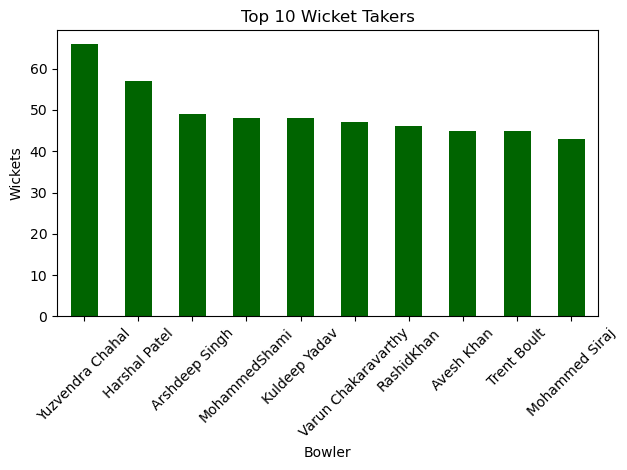

In [28]:
top_wicket_takers = dim_df.groupby('Bowler Name')['wickets'].sum().sort_values(ascending=False).head(10)
top_wicket_takers.plot(kind='bar', color='darkgreen')
plt.title("Top 10 Wicket Takers")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


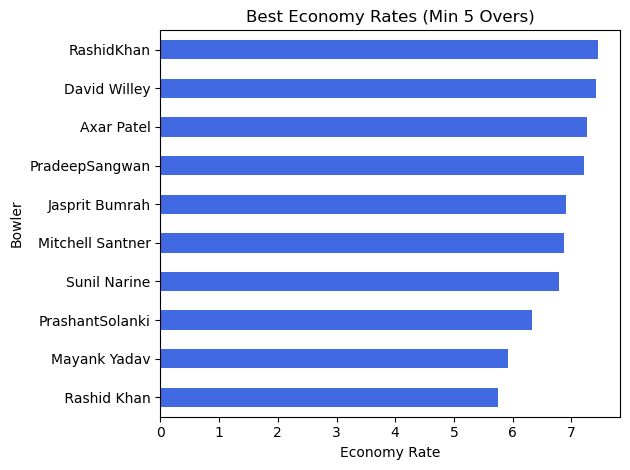

In [29]:
economy = dim_df.groupby('Bowler Name').agg({'overs': 'sum', 'runs': 'sum'})
economy = economy[economy['overs'] >= 5]
economy['economy'] = economy['runs'] / economy['overs']
best_economy = economy.sort_values('economy').head(10)

best_economy['economy'].plot(kind='barh', color='royalblue')
plt.title("Best Economy Rates (Min 5 Overs)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()


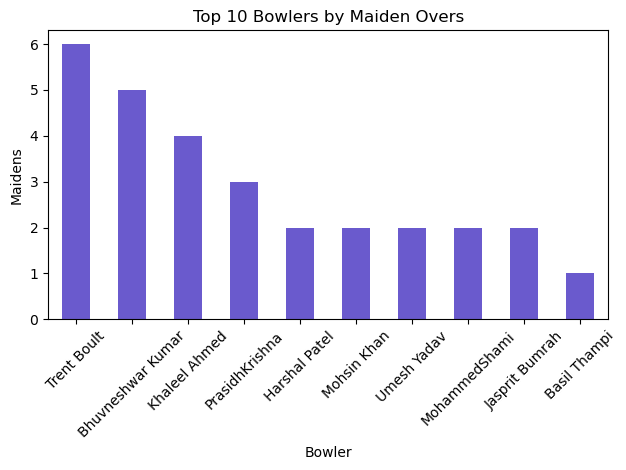

In [30]:
maidens = dim_df.groupby('Bowler Name')['maiden'].sum().sort_values(ascending=False).head(10)
maidens.plot(kind='bar', color='slateblue')
plt.title("Top 10 Bowlers by Maiden Overs")
plt.xlabel("Bowler")
plt.ylabel("Maidens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


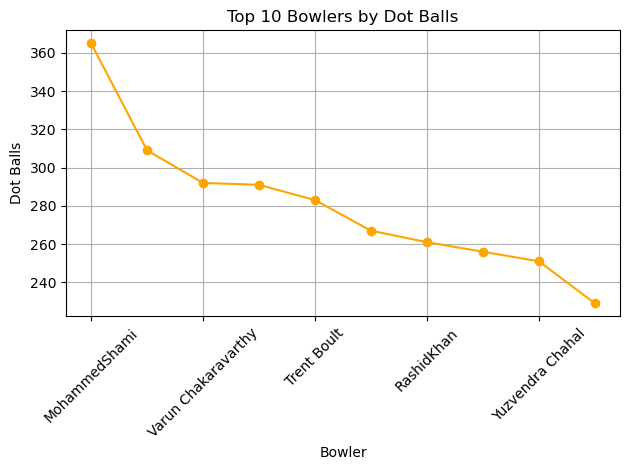

In [33]:
dots = dim_df.groupby('Bowler Name')['Zeros'].sum().sort_values(ascending=False).head(10)
dots.plot(kind='line', marker='o', color='orange')
plt.title("Top 10 Bowlers by Dot Balls")
plt.xlabel("Bowler")
plt.ylabel("Dot Balls")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# dim_df.columns 

Index(['match_id', 'match', 'bowlingTeam', 'Bowler Name', 'overs', 'balls',
       'maiden', 'runs', 'wickets', 'economy', 'Zeros', 'wides', 'noBalls',
       'Year'],
      dtype='object')

In [34]:
# Save to Excel file
dim_df.to_excel('fact_bowling_summary.xlsx', index=False)


In [160]:
from IPython.display import FileLink
FileLink('fact_bowling_summary.xlsx')


C:\Users\ASUS\fact_bowling_summary.xlsx